In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
from astropy import units as u
from pathlib import Path
import scipy

import setigen as stg

IMG_DIR = Path("../../docs/source/images/")

In [2]:
# Sometimes it can be necessary to re-run this command for plots to show automatically
%matplotlib inline

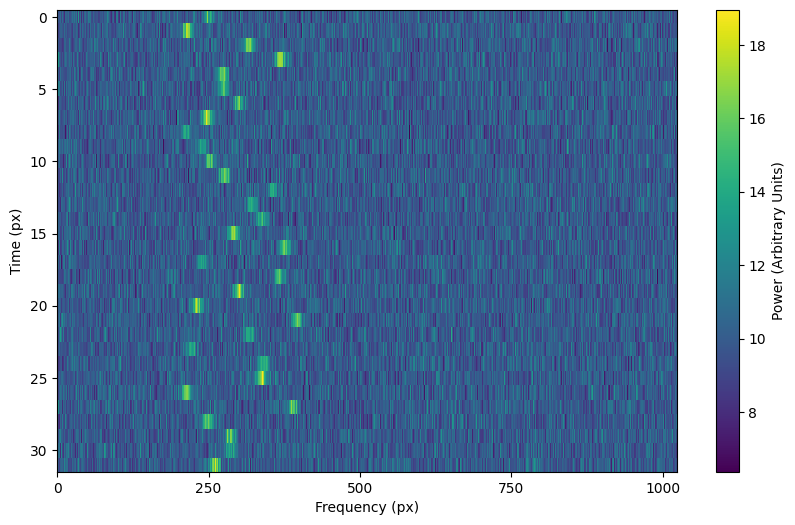

In [4]:
frame = stg.Frame(fchans=1024*u.pixel,
                    tchans=32*u.pixel,
                    df=2.7939677238464355*u.Hz,
                    dt=18.253611008*u.s,
                    fch1=6095.214842353016*u.MHz)
frame.add_noise(x_mean=10)

path_array = np.random.uniform(frame.get_frequency(200),
                                frame.get_frequency(400),
                                32)
t_profile_array = np.random.uniform(frame.get_intensity(snr=20),
                                    frame.get_intensity(snr=40),
                                    32)

frame.add_signal(path_array,
                    t_profile_array,
                    stg.gaussian_f_profile(width=40*u.Hz),
                    stg.constant_bp_profile(level=1))

fig = plt.figure(figsize=(10, 6))
frame.plot(xtype="px", db=False)
plt.savefig(IMG_DIR / 'advanced_array_synth.png', bbox_inches='tight')
plt.show()

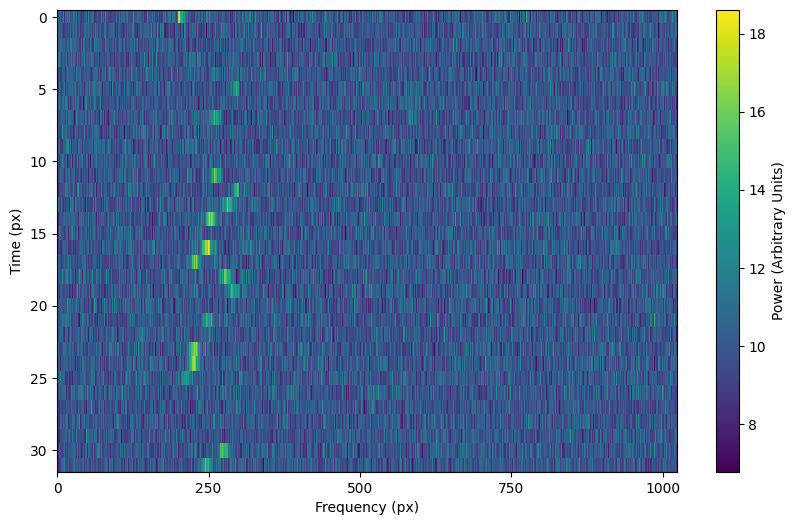

In [10]:
frame = stg.Frame(fchans=1024*u.pixel,
                    tchans=32*u.pixel,
                    df=2.7939677238464355*u.Hz,
                    dt=18.253611008*u.s,
                    fch1=6095.214842353016*u.MHz)
frame.add_noise(x_mean=10)

path_array = np.random.uniform(frame.get_frequency(200),
                                frame.get_frequency(400),
                                32)
t_profile_array = np.random.uniform(frame.get_intensity(snr=20),
                                    frame.get_intensity(snr=40),
                                    32)

frame.add_signal(path_array,
                    t_profile_array,
                    stg.gaussian_f_profile(width=40*u.Hz),
                    stg.constant_bp_profile(level=1),
                    bounding_f_range=(frame.get_frequency(200),
                                    frame.get_frequency(300)))

fig = plt.figure(figsize=(10, 6))
frame.plot(xtype="px", db=False)
plt.savefig(IMG_DIR / 'advanced_array_synth_trunc.png', bbox_inches='tight')
plt.show()

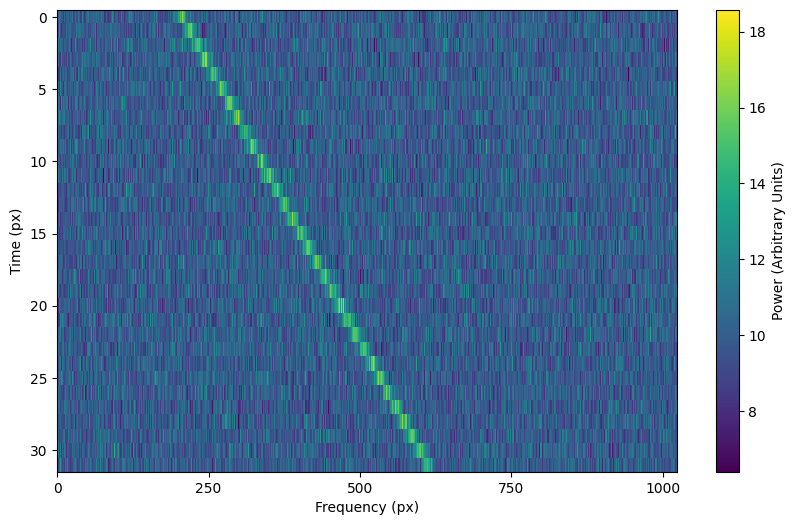

In [11]:
frame = stg.Frame(fchans=1024*u.pixel,
                    tchans=32*u.pixel,
                    df=2.7939677238464355*u.Hz,
                    dt=18.253611008*u.s,
                    fch1=6095.214842353016*u.MHz)
frame.add_noise(x_mean=10)

frame.add_signal(stg.constant_path(f_start=frame.get_frequency(200),
                                    drift_rate=2*u.Hz/u.s),
                    stg.constant_t_profile(level=frame.get_intensity(snr=30)),
                    stg.gaussian_f_profile(width=40*u.Hz),
                    stg.constant_bp_profile(level=1),
                    integrate_path=True,
                    integrate_t_profile=True,
                    integrate_f_profile=True,
                    t_subsamples=10,
                    f_subsamples=10)

fig = plt.figure(figsize=(10, 6))
frame.plot(xtype="px", db=False)
plt.savefig(IMG_DIR / 'advanced_accuracy.png', bbox_inches='tight')
plt.show()